In [1]:
import pandas as pd

df = pd.read_parquet('../data/parquet/dataset_site_info.parquet')

df = df.drop(columns=['dataset_id', 'replica_time_create', 'br_user_group_id'])
df = df.dropna()

for word in ['BUNNIES', 'Commissioning', 'RelVal']:
    df = df[~df['dataset_name'].str.contains(word)]

df.head(None)


,dataset_name,node_name,rep_size,min_time,max_time,tier
0,/JetHT/Run2016B-23Sep2016-v1/MINIAOD,T1_RU_JINR_Disk,2.235519e+11,2020-03-07,2020-12-31,MINIAOD
1,/QCD_Pt_120to170_TuneCP5_13TeV_pythia8/RunIISu...,T2_IN_TIFR,5.754734e+11,2020-07-02,2020-12-31,MINIAODSIM
2,/EGamma/Run2018A-EcalUncalZElectron-12Nov2019_...,T2_IN_TIFR,1.779573e+12,2020-10-03,2020-12-31,ALCARECO
3,/QCD_HT1500to2000_TuneCP5_PSWeights_13TeV-madg...,T1_US_FNAL_Disk,1.753403e+11,2020-01-18,2020-12-31,MINIAODSIM
4,/QCD_Pt_50to80_TuneCUETP8M1_13TeV_pythia8/RunI...,T2_CH_CERN,1.026091e+12,2019-01-01,2020-12-31,ALCARECO
...,...,...,...,...,...,...
6752625,/WZTo3LNu_mllmin01_NNPDF31_TuneCP5_13TeV_powhe...,T2_UK_SGrid_RALPP,3.800483e+09,2019-01-16,2019-01-16,AODSIM
6752626,/SMS-T1qqqq_mGluino-1400_mLSP-100_TuneCUETP8M1...,T2_EE_Estonia,5.924122e+10,2019-02-13,2019-02-14,GEN-SIM
6752627,/HIDoubleMuon/HIRun2018A-04Apr2019-v1/DQMIO,T1_DE_KIT_Disk,1.941605e+07,2019-04-18,2019-04-18,DQMIO
6752628,/SMS-T5qqqqHg_refPoints_TuneCP2_13TeV-madgraph...,T1_IT_CNAF_Disk,7.544165e+08,2020-06-11,2020-06-11,MINIAODSIM


In [2]:
from cmSim.container import DataContainer

datatiers = ['RAW', 'RECO', 'RAW-RECO', 'GEN-SIM',
             'GEN-SIM-RAW', 'GEN-SIM-RECO', 'ALCARECO',
             'USER', 'GEN-SIM-DIGI-RAW',
             'AOD', 'MINIAOD', 'AODSIM', 'MINIAODSIM']
data = DataContainer.from_dataframe(df)


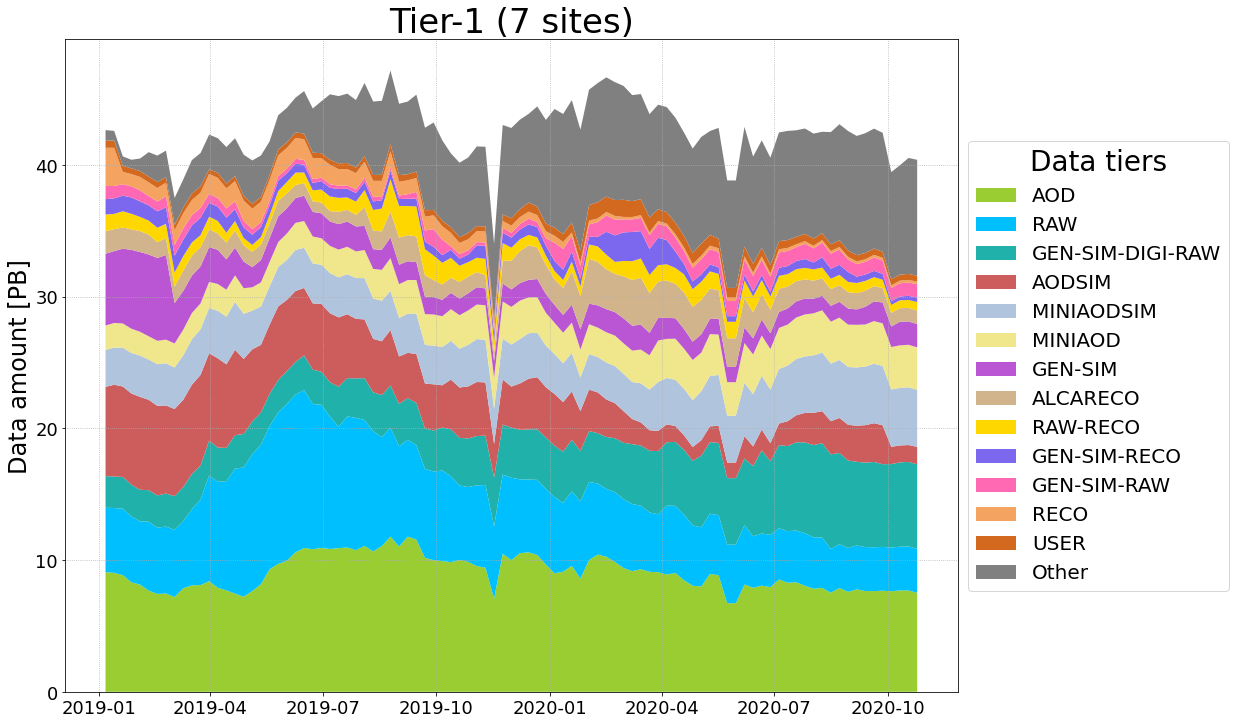

In [3]:
import pylab as plt

fig, ax = plt.subplots(figsize=(16, 12))
data.plot_storage_history_by_datatier(
    ax, datatiers, tier='T1', date1='2019-01-01', date2='2020-10-31', freq='W')
ax.set_title('Tier-1 (7 sites)', fontsize=34)
fig.set_facecolor('white')

plt.show()


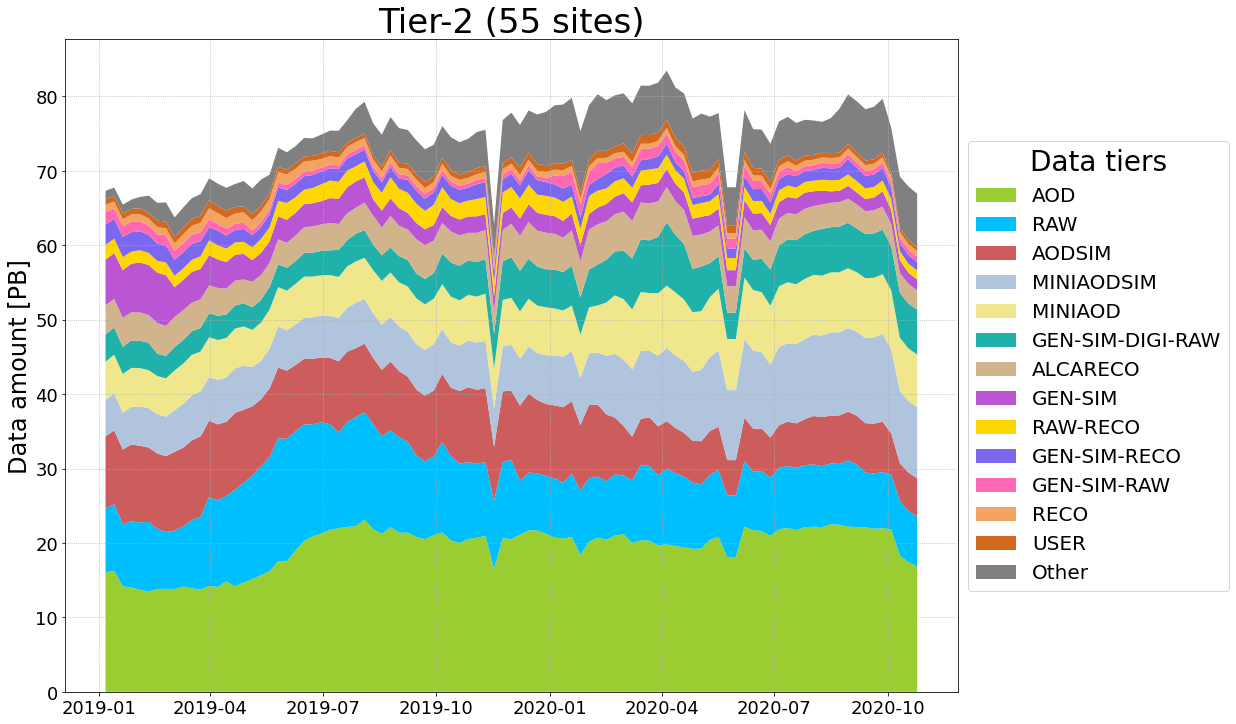

In [4]:
fig, ax = plt.subplots(figsize=(16, 12))
data.plot_storage_history_by_datatier(
    ax, datatiers, tier='T2', date1='2019-01-01', date2='2020-10-31', freq='W')
ax.set_title('Tier-2 (55 sites)', fontsize=34)
fig.set_facecolor('white')

plt.show()
